In [18]:
import pandas as pd
df = pd.read_csv('patient_outcomes.csv')
print(df.head())

   patient_id  age  gender  diagnosis  heart_rate  respiratory_rate  \
0        1000   70    Male  Pneumonia          65                12   
1        1001   63    Male  Pneumonia          78                20   
2        1002   72  Female  Pneumonia          93                17   
3        1003   83  Female     Sepsis          67                15   
4        1004   62    Male       COPD          46                12   

   blood_pressure  oxygen_saturation  white_blood_cell_count treatment_given  \
0             115               96.2                     7.5     Antibiotics   
1             139               94.2                     7.2     Antibiotics   
2             126               95.3                     3.7      Ventilator   
3             139               96.4                    14.2  Oxygen Therapy   
4             116               94.4                     5.1     Antibiotics   

   outcome  
0        1  
1        1  
2        1  
3        0  
4        1  


First 5 rows:


,patient_id,age,gender,diagnosis,heart_rate,respiratory_rate,blood_pressure,oxygen_saturation,white_blood_cell_count,treatment_given,outcome
0,1000,70,Male,Pneumonia,65,12,115,96.2,7.5,Antibiotics,1
1,1001,63,Male,Pneumonia,78,20,139,94.2,7.2,Antibiotics,1
2,1002,72,Female,Pneumonia,93,17,126,95.3,3.7,Ventilator,1
3,1003,83,Female,Sepsis,67,15,139,96.4,14.2,Oxygen Therapy,0
4,1004,62,Male,COPD,46,12,116,94.4,5.1,Antibiotics,1


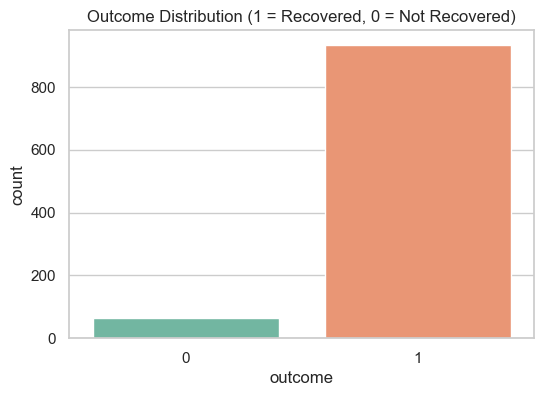

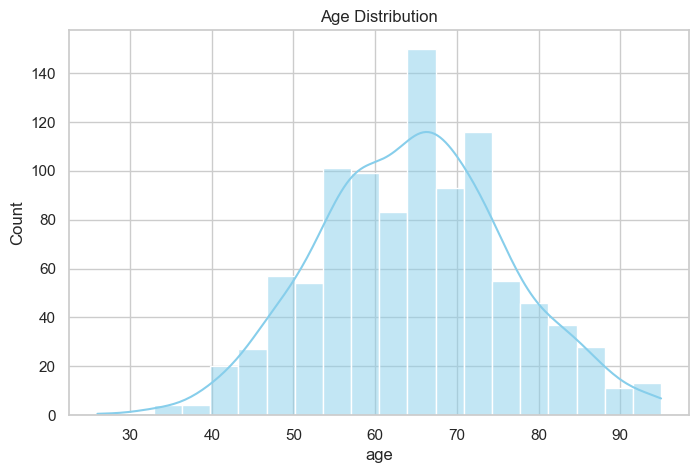

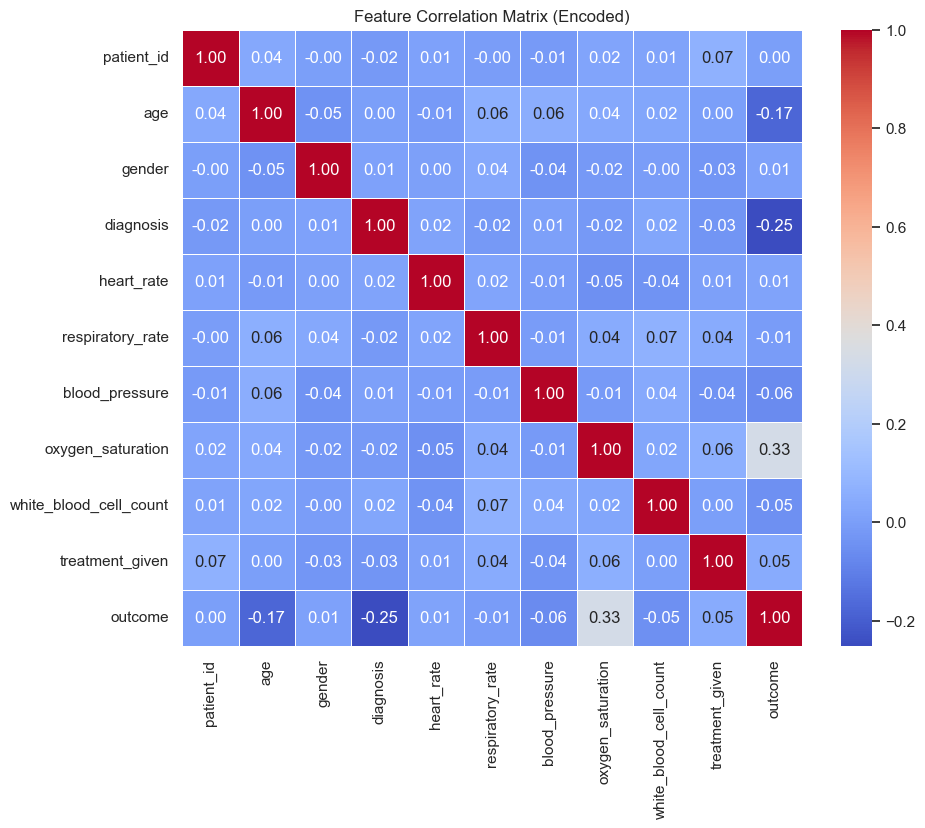

--- Random Forest ---
Accuracy: 0.995
F1 Score: 0.9973333333333333
ROC AUC: 0.9615384615384616
[[ 12   1]
 [  0 187]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.99      1.00      1.00       187

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200

--- XGBoost ---
Accuracy: 1.0
F1 Score: 1.0
ROC AUC: 1.0
[[ 13   0]
 [  0 187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00       187

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



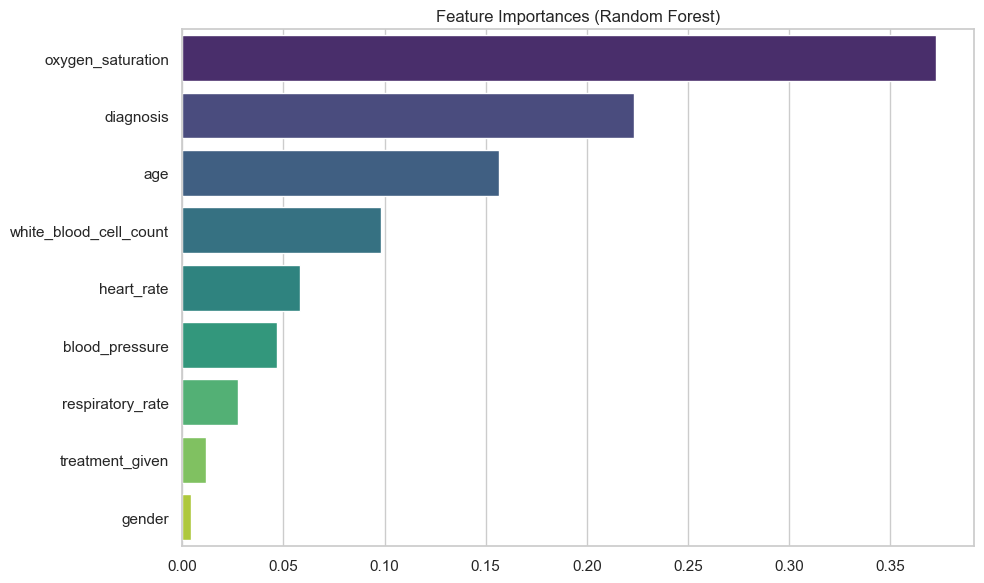

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# 2. Load Dataset
df = pd.read_csv('patient_outcomes.csv')
print("First 5 rows:")
display(df.head())

# 3. Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='outcome', data=df, palette='Set2')
plt.title('Outcome Distribution (1 = Recovered, 0 = Not Recovered)')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Correlation matrix
df_encoded = df.copy()
categorical_cols = ['gender', 'diagnosis', 'treatment_given']

# Using LabelEncoder to convert strings to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# computing correlation only on numeric columns
plt.figure(figsize=(10,8))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix (Encoded)')
plt.show()

# 4. Preprocessing
df.dropna(inplace=True)

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['treatment_given'] = le.fit_transform(df['treatment_given'])

X = df.drop(['patient_id', 'outcome'], axis=1)
y = df['outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 6. Model Training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 7. Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

# 8. Feature Importance
feature_names = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()